In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import LogNorm, Normalize
import matplotlib
#from bioinfokit import analys, visuz
color_palette = sns.color_palette("colorblind")

sns.set_theme(palette=color_palette, font="Arial", font_scale=1.0, style="white")
#plt.style.use('./poster.mplstyle')


matplotlib.rcParams.update({'font.size': 20, 'font.style': 'normal', 'axes.titlesize': 8, 'axes.labelsize': 20,
                           'xtick.labelsize': 20, 'ytick.labelsize': 20, 'legend.fontsize':8,
                            'text.usetex': False, 'svg.fonttype': 'none',
                            'xtick.direction' : 'out', 'ytick.direction' : 'out',
                            'xtick.bottom': True, 'ytick.left': True,})

import statsmodels.stats.multitest as smm
import numpy as np


In [2]:
#load count matrix (normalized)
counts_genes_norm = pd.read_csv("results_gene_counts_normalized_221011.csv")  
counts_genes_norm.rename(columns={"Unnamed: 0": "GENEID"}, inplace = True)
#rearrange columns
counts_genes_norm = counts_genes_norm[['GENEID', 
              'filtered_S1_quant_filtered',
              'filtered_S2_quant_filtered',
              'filtered_S3_quant_filtered',
              'filtered_S4_quant_filtered',
              'filtered_S5_quant_filtered',
              'filtered_S6_quant_filtered',
              'filtered_S7_quant_filtered',
              'filtered_S9_quant_filtered',
              'filtered_S10_quant_filtered',
              'filtered_S11_quant_filtered',
              'filtered_S12_quant_filtered',]]

In [3]:
counts_genes_norm

,GENEID,filtered_S1_quant_filtered,filtered_S2_quant_filtered,filtered_S3_quant_filtered,filtered_S4_quant_filtered,filtered_S5_quant_filtered,filtered_S6_quant_filtered,filtered_S7_quant_filtered,filtered_S9_quant_filtered,filtered_S10_quant_filtered,filtered_S11_quant_filtered,filtered_S12_quant_filtered
0,ENSMUSG00000000001,6139.087892,5404.041597,5279.556633,5351.575757,5831.277326,5538.088767,6605.035737,6806.588333,6966.762873,7025.806792,7248.501393
1,ENSMUSG00000000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ENSMUSG00000000028,155.805146,135.990264,79.848842,145.731729,91.712611,75.633295,97.553618,162.329294,88.366654,218.061196,238.477887
3,ENSMUSG00000000037,30.984520,37.087432,33.373452,31.540693,26.003765,18.982645,13.119398,58.842429,9.619295,8.323432,18.805846
4,ENSMUSG00000000049,2.582788,0.000000,0.000000,0.000000,2.028529,0.000000,0.000000,0.810808,0.951307,11.639252,0.995061
...,...,...,...,...,...,...,...,...,...,...,...,...
35677,ENSMUSG00000118670,2.978752,2.337564,0.616984,3.960685,5.924034,1.133381,1.217630,0.961659,1.047330,3.481011,3.321655
35678,ENSMUSG00000118671,241.255582,237.750409,194.273718,214.923232,377.307679,283.072573,222.546772,383.331392,237.189346,190.096005,219.264328
35679,ENSMUSG00000118672,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
35680,ENSMUSG00001074846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
#load results table
res_genes = pd.read_csv("shrink_Anno.csv", 
                        usecols = ['Unnamed: 0','GENENAME', "log2FoldChange", "padj"])  
res_genes.rename(columns={"Unnamed: 0": "GENEID"}, inplace=True)

In [5]:
res_genes

,GENEID,log2FoldChange,padj,GENENAME
0,ENSMUSG00000000001,0.290552,0.000096,Gnai3
1,ENSMUSG00000000003,NaN,NaN,Pbsn
2,ENSMUSG00000000028,0.023191,0.564404,Cdc45
3,ENSMUSG00000000037,-0.009071,0.786633,Scml2
4,ENSMUSG00000000049,0.003275,NaN,Apoh
...,...,...,...,...
35677,ENSMUSG00000118670,-0.002622,NaN,NaN
35678,ENSMUSG00000118671,-0.003083,0.982947,EPPK1
35679,ENSMUSG00000118672,NaN,NaN,Muc4
35680,ENSMUSG00001074846,NaN,NaN,NaN


In [6]:
#thresholds for DE genes
th_padj = 0.05 
th_log2FC = 1

In [7]:
#gene lists
cav_channels_list = ["Cacna1a", #Cav2.1
                    "Cacna1b", #Cav2.2
                    "Cacna1c", #Cav1.2
                    "Cacna1d", #Cav1.3
                    "Cacna1e", #Cav2.3
                    "Cacna1f", #Cav1.4
                    "Cacna1g", #Cav3.1
                    "Cacna1h", #Cav3.2
                    "Cacna1i", #Cav3.3
                    "Cacna1s",]#Cav1.1
cav_channels = res_genes[res_genes["GENENAME"].isin(cav_channels_list)]
######################################
DE_up = res_genes[(res_genes["log2FoldChange"]>th_log2FC) & (res_genes["padj"]<th_padj)]
######################################
DE_down = res_genes[(res_genes["log2FoldChange"]<-th_log2FC) & (res_genes["padj"]<th_padj)]

In [8]:
DE_down

,GENEID,log2FoldChange,padj,GENENAME
4008,ENSMUSG00000023033,-1.032317,0.025720,Scn8a
4278,ENSMUSG00000024112,-1.348250,0.000039,Cacna1h
8657,ENSMUSG00000032010,-1.063745,0.007655,Usp2
27354,ENSMUSG00000099034,-1.058356,0.000236,2810039B14Rik


In [9]:
DE_down = DE_down.sort_values(by="log2FoldChange", ascending=True)
DE_up = DE_up.sort_values(by="log2FoldChange", ascending=True)

In [10]:
DE_down.to_csv("DE_down_padj0p05_LFC1_230413.csv")
DE_up.to_csv("DE_up_padj0p05_LFC1_230413.csv")

In [11]:
#merge counts and results

######################################
cav_channels_counts_norm = cav_channels.merge(counts_genes_norm, how = "left", 
                           left_on='GENEID', 
                           right_on='GENEID', 
                           validate="one_to_one")
cav_channels_counts_norm.drop(columns=['GENEID', "log2FoldChange", "padj"], inplace=True)
cav_channels_counts_norm.set_index('GENENAME', inplace=True)
######################################

######################################
DE_up_counts_norm = DE_up.merge(counts_genes_norm, how = "left", 
                           left_on='GENEID', 
                           right_on='GENEID', 
                           validate="one_to_one")
DE_up_counts_norm.drop(columns=['GENEID', "log2FoldChange", "padj"], inplace=True)
DE_up_counts_norm.set_index('GENENAME', inplace=True)
######################################

DE_down_counts_norm = DE_down.merge(counts_genes_norm, how = "left", 
                           left_on='GENEID', 
                           right_on='GENEID', 
                           validate="one_to_one")
DE_down_counts_norm.drop(columns=['GENEID', "log2FoldChange", "padj"], inplace=True)
DE_down_counts_norm.set_index('GENENAME', inplace=True)

In [12]:
cav_channels_counts_norm_WT = cav_channels_counts_norm.drop(['filtered_S7_quant_filtered',
                          'filtered_S9_quant_filtered',
                         'filtered_S10_quant_filtered',
                         'filtered_S11_quant_filtered',
                         'filtered_S12_quant_filtered'], axis=1)\
                        .reindex(['Cacna1h', 'Cacna1g', 'Cacna1i',
                                'Cacna1s', 'Cacna1c', 'Cacna1d', 'Cacna1f',
                               'Cacna1a', 'Cacna1b', 'Cacna1e'])

cav_channels_counts_norm_WT.columns = cav_channels_counts_norm_WT.columns.str.replace("filtered_", "")\
                                .str.replace("_quant_filtered", "")



C:\Users\dinhha\AppData\Local\Temp\ipykernel_15364\2326080422.py:2: RuntimeWarning: divide by zero encountered in log2
  fig = sns.clustermap(np.nan_to_num(np.log2(cav_channels_counts_norm_WT.values), neginf=0, posinf=0),


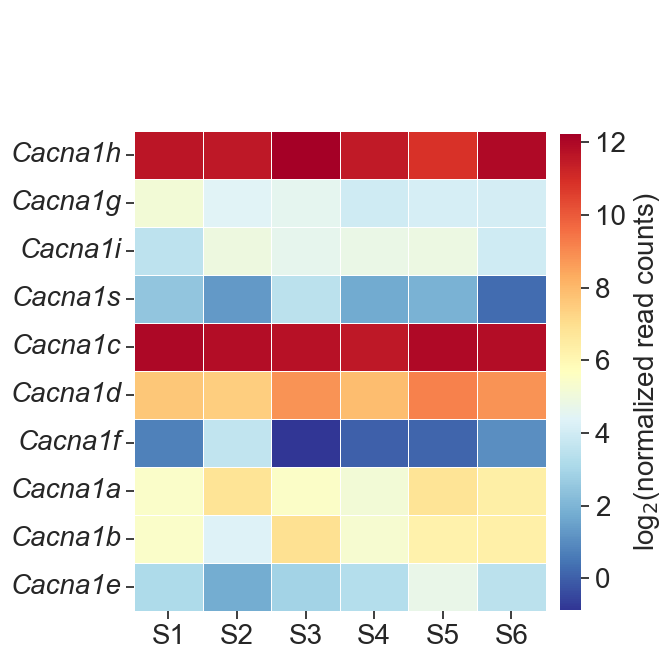

In [13]:
#Version 1 log2 transformed normalized read counts, not sorted
fig = sns.clustermap(np.nan_to_num(np.log2(cav_channels_counts_norm_WT.values), neginf=0, posinf=0), 
               figsize = (7,7),
              cbar_pos=(0.8, 0.1, 0.03, 0.68),
                cbar_kws = {"label": "log$_2$(normalized read counts)"},
               col_cluster=False,
               row_cluster=False,
               linewidths=.5,
               cmap="RdYlBu_r",
               xticklabels=cav_channels_counts_norm_WT.columns.values, 
               yticklabels=cav_channels_counts_norm_WT.index.values)

fig.ax_heatmap.yaxis.set_ticks_position('left')
for label in fig.ax_heatmap.get_yticklabels():
        # Here it sets all italic. 
        label.set_style("italic")
        
df_table = cav_channels_counts_norm_WT.transform([np.log2])
df_table.replace([np.inf, -np.inf], np.nan, inplace=True)
df_table['mean'] = df_table.mean(axis=1)
df_table = df_table.round(3)

C:\Users\dinhha\AppData\Local\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


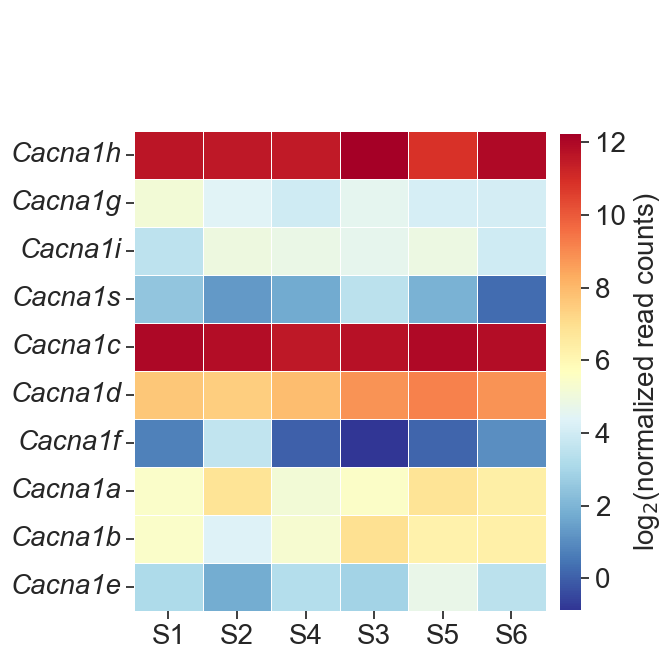

In [14]:
#Version 2 log2 transformed normalized read counts (samples sorted)
data_norm_count_WT = cav_channels_counts_norm_WT.reindex(columns=['S1','S2','S4','S3','S5','S6'])

fig = sns.clustermap(np.nan_to_num(np.log2(data_norm_count_WT), neginf=0, posinf=0), 
               figsize = (7,7),
              cbar_pos=(0.8, 0.1, 0.03, 0.68),
                cbar_kws = {"label": "log$_2$(normalized read counts)"},
               col_cluster=False,
               row_cluster=False,
               linewidths=.5,
               cmap="RdYlBu_r",
               xticklabels=data_norm_count_WT.columns.values, 
               yticklabels=data_norm_count_WT.index.values)

fig.ax_heatmap.yaxis.set_ticks_position('left')
for label in fig.ax_heatmap.get_yticklabels():
        # Here it sets all italic. 
        label.set_style("italic")
        
        
fig.savefig("RNASeq_heatmap_log2norm_WT_sort.png", dpi=1200)
fig.savefig("RNASeq_heatmap_log2norm_WT_sort.svg", dpi=1200)

df_table = cav_channels_counts_norm_WT.transform([np.log2])
df_table.replace([np.inf, -np.inf], np.nan, inplace=True)
df_table['mean'] = df_table.mean(axis=1)
df_table = df_table.round(3)
df_table.to_excel("RNASeq_heatmap_log2norm_WT_sort.xlsx")

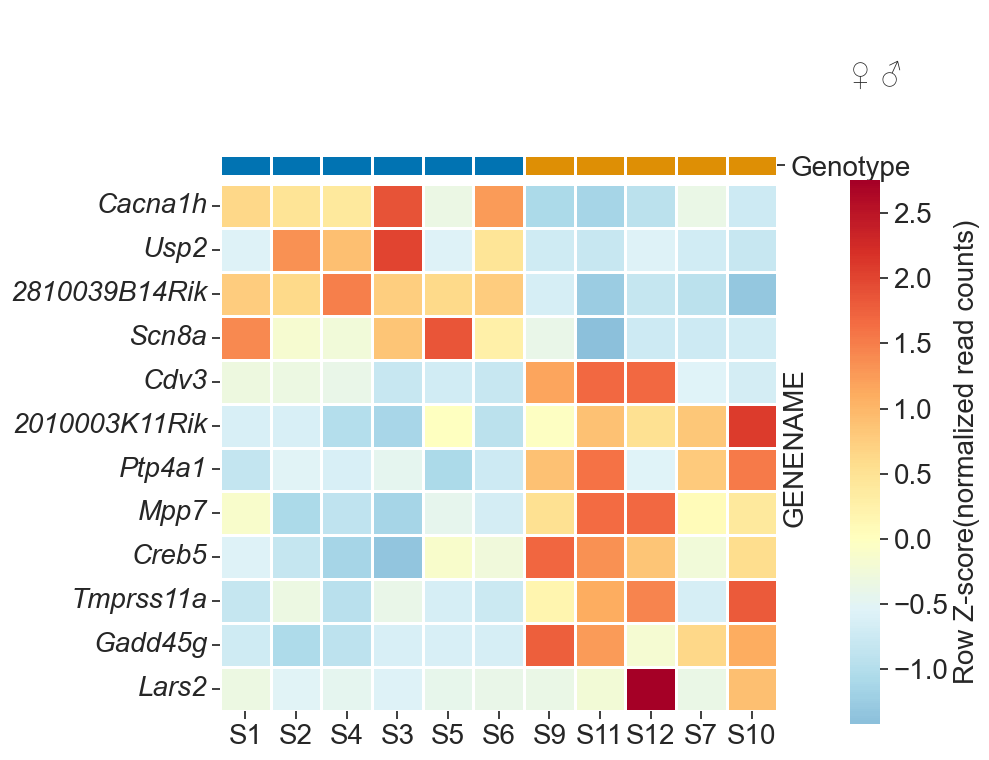

In [15]:
#normalized read counts of DEGs (samples sorted)


col_colors = pd.DataFrame({'Genotype': [color_palette[0], 
                                        color_palette[0],
                                        color_palette[0],
                                        color_palette[0],
                                        color_palette[0],
                                        color_palette[0],
                                        color_palette[1],
                                        color_palette[1],
                                        color_palette[1],
                                        color_palette[1],
                                        color_palette[1]]},
             index = ['S1','S2','S4','S3','S5','S6','S9','S11','S12','S7','S10'])
data = pd.concat([DE_down_counts_norm, DE_up_counts_norm])

data.columns = data.columns.str.replace("filtered_", "")\
                                .str.replace("_quant_filtered", "")
data = data.reindex(columns=['S1','S2','S4','S3','S5','S6','S9','S11','S12','S7','S10'])

heatmap_DE_genes = sns.clustermap(data, 
                figsize = (10,8),
                cbar_pos=(0.8, 0.07, 0.03, 0.68),
                cbar_kws = {"label": "Row Z-score(normalized read counts)"},
                col_cluster=False,
                row_cluster=False,
                center=0,
                z_score=0,
                cmap="RdYlBu_r",
                linewidths=1,
                col_colors=col_colors,
               xticklabels=data.columns.values, 
               yticklabels=data.index.values)

plt.text(0,3.5,"\u2640")
plt.text(1,3.5,"\u2642")


heatmap_DE_genes.ax_heatmap.yaxis.set_ticks_position('left')
for label in heatmap_DE_genes.ax_heatmap.get_yticklabels():
        # Here it sets all italic. 
        label.set_style("italic")


In [16]:
data

,S1,S2,S4,S3,S5,S6,S9,S11,S12,S7,S10
GENENAME,,,,,,,,,,,
Cacna1h,3148.824342,2961.442273,2861.625201,4805.078662,1852.636167,3965.088183,913.491127,799.234153,1083.394886,1833.043304,1375.637713
Usp2,353.761252,943.645858,805.022465,1143.284119,354.304431,668.809561,306.595717,283.911031,352.798390,313.681864,276.613791
2810039B14Rik,47.638496,45.349691,58.362152,47.350445,45.374383,47.840781,26.810400,18.281510,24.600960,22.765695,17.413581
Scn8a,84.597633,44.022306,42.206962,70.152332,95.562270,54.884811,38.040779,11.708935,29.013994,29.523725,30.534376
Cdv3,6195.037841,6098.749640,5657.570588,3450.157444,4071.454514,3402.872718,14453.471992,17230.715521,17252.263170,4843.811763,4085.166035
2010003K11Rik,102.579156,101.663795,75.468703,65.938991,147.139626,80.474888,146.627198,212.446642,186.338228,209.334702,300.644785
Ptp4a1,139.334162,177.792125,164.573685,187.020716,110.180714,151.476196,348.436748,436.844910,176.280452,337.427074,428.556365
Mpp7,785.960971,393.878317,466.904033,358.691435,660.768385,555.795535,1053.990221,1525.348402,1538.449552,867.684910,999.987399
Creb5,2829.850266,2253.985454,1584.574861,1170.774466,3830.688737,3491.473629,7796.595999,7018.708518,5932.450793,3519.029769,5329.852441


In [17]:
DE_down_counts_norm

,filtered_S1_quant_filtered,filtered_S2_quant_filtered,filtered_S3_quant_filtered,filtered_S4_quant_filtered,filtered_S5_quant_filtered,filtered_S6_quant_filtered,filtered_S7_quant_filtered,filtered_S9_quant_filtered,filtered_S10_quant_filtered,filtered_S11_quant_filtered,filtered_S12_quant_filtered
GENENAME,,,,,,,,,,,
Cacna1h,3148.824342,2961.442273,4805.078662,2861.625201,1852.636167,3965.088183,1833.043304,913.491127,1375.637713,799.234153,1083.394886
Usp2,353.761252,943.645858,1143.284119,805.022465,354.304431,668.809561,313.681864,306.595717,276.613791,283.911031,352.798390
2810039B14Rik,47.638496,45.349691,47.350445,58.362152,45.374383,47.840781,22.765695,26.810400,17.413581,18.281510,24.600960
Scn8a,84.597633,44.022306,70.152332,42.206962,95.562270,54.884811,29.523725,38.040779,30.534376,11.708935,29.013994
